In [2]:
import os
import zipfile
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [4]:
zip_file = "data.zip"
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall("data")

In [5]:
os.listdir("data")

['data']

In [7]:
dataset_path = "data/data"
with_mask_path = os.path.join(dataset_path, "with_mask")
without_mask_path = os.path.join(dataset_path, "without_mask")

print(os.listdir(with_mask_path))

['with_mask_2212.jpg', 'with_mask_3343.jpg', 'with_mask_1834.jpg', 'with_mask_1252.jpg', 'with_mask_2579.jpg', 'with_mask_501.jpg', 'with_mask_2368.jpg', 'with_mask_1795.jpg', 'with_mask_60.jpg', 'with_mask_2799.jpg', 'with_mask_749.jpg', 'with_mask_195.jpg', 'with_mask_3214.jpg', 'with_mask_1462.jpg', 'with_mask_1477.jpg', 'with_mask_1918.jpg', 'with_mask_11.jpg', 'with_mask_792.jpg', 'with_mask_2044.jpg', 'with_mask_2942.jpg', 'with_mask_916.jpg', 'with_mask_1920.jpg', 'with_mask_2959.jpg', 'with_mask_2236.jpg', 'with_mask_1307.jpg', 'with_mask_428.jpg', 'with_mask_123.jpg', 'with_mask_2049.jpg', 'with_mask_3099.jpg', 'with_mask_2137.jpg', 'with_mask_3418.jpg', 'with_mask_2936.jpg', 'with_mask_2242.jpg', 'with_mask_85.jpg', 'with_mask_2010.jpg', 'with_mask_2652.jpg', 'with_mask_810.jpg', 'with_mask_3607.jpg', 'with_mask_2016.jpg', 'with_mask_3118.jpg', 'with_mask_1522.jpg', 'with_mask_3556.jpg', 'with_mask_3286.jpg', 'with_mask_2739.jpg', 'with_mask_1841.jpg', 'with_mask_1161.jpg', '

In [8]:
# Parameters
img_height, img_width = 128, 128
batch_size = 32

In [9]:
def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        file_path = os.path.join(folder, filename)
        if filename.endswith(('.jpg', '.png', '.jpeg')):
            try:
                img = load_img(file_path, target_size=(img_height, img_width))
                img_array = img_to_array(img) / 255.0  # Normalize pixel values
                images.append(img_array)
                labels.append(label)
            except Exception as e:
                print(f"Error loading image {file_path}: {e}")
    return images, labels

# Load images and labels
with_mask_images, with_mask_labels = load_images_from_folder(with_mask_path, 0)  # Label 0 for "with_mask"
without_mask_images, without_mask_labels = load_images_from_folder(without_mask_path, 1)  # Label 1 for "without_mask"

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [10]:
images = np.array(with_mask_images + without_mask_images)
labels = np.array(with_mask_labels + without_mask_labels)

In [12]:
print(images.shape)
print(labels.shape)

(7553, 128, 128, 3)
(7553,)


In [13]:
X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.3, stratify=labels, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

In [14]:
# One-hot encode labels
y_train = to_categorical(y_train, num_classes=2)
y_val = to_categorical(y_val, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

In [15]:
# Data augmentation
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow(X_train, y_train, batch_size=batch_size)

In [16]:
# CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.4),

    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    validation_data=(X_val, y_val),
    epochs=15,
    batch_size=batch_size,
    verbose=1
)

Epoch 1/15
166/166 ━━━━━━━━━━━━━━━━━━━━ 327s 2s/step - accuracy: 0.7752 - loss: 0.6112 - val_accuracy: 0.5260 - val_loss: 0.8548
Epoch 2/15
166/166 ━━━━━━━━━━━━━━━━━━━━ 312s 2s/step - accuracy: 0.8214 - loss: 0.4265 - val_accuracy: 0.6231 - val_loss: 0.6945
Epoch 3/15
166/166 ━━━━━━━━━━━━━━━━━━━━ 329s 2s/step - accuracy: 0.8575 - loss: 0.3488 - val_accuracy: 0.8667 - val_loss: 0.3002
Epoch 4/15
166/166 ━━━━━━━━━━━━━━━━━━━━ 314s 2s/step - accuracy: 0.8674 - loss: 0.3299 - val_accuracy: 0.7573 - val_loss: 0.5872
Epoch 5/15
166/166 ━━━━━━━━━━━━━━━━━━━━ 310s 2s/step - accuracy: 0.8811 - loss: 0.3002 - val_accuracy: 0.9214 - val_loss: 0.2073
Epoch 6/15
166/166 ━━━━━━━━━━━━━━━━━━━━ 313s 2s/step - accuracy: 0.8813 - loss: 0.2873 - val_accuracy: 0.9294 - val_loss: 0.2214
Epoch 7/15
166/166 ━━━━━━━━━━━━━━━━━━━━ 322s 2s/step - accuracy: 0.8943 - loss: 0.2562 - val_accuracy: 0.8085 - val_loss: 0.4345
Epoch 8/15
166/166 ━━━━━━━━━━━━━━━━━━━━ 317s 2s/step - accuracy: 0.8919 - loss: 0.2635 - val_accu

In [19]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

36/36 ━━━━━━━━━━━━━━━━━━━━ 13s 370ms/step - accuracy: 0.9723 - loss: 0.0841
Test Accuracy: 0.98


36/36 ━━━━━━━━━━━━━━━━━━━━ 13s 357ms/step


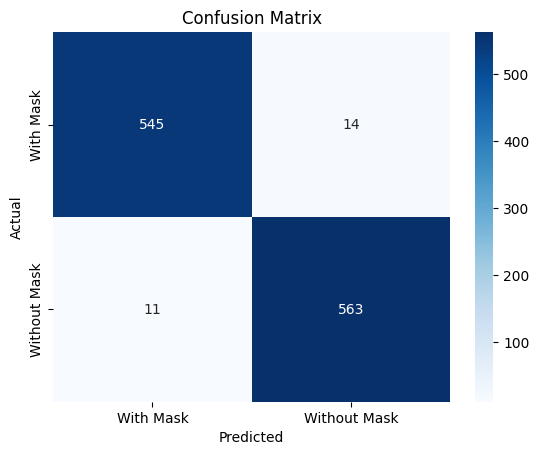

In [20]:
predictions = np.argmax(model.predict(X_test), axis=1)
true_labels = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(true_labels, predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['With Mask', 'Without Mask'], yticklabels=['With Mask', 'Without Mask'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


              precision    recall  f1-score   support

   With Mask       0.98      0.97      0.98       559
Without Mask       0.98      0.98      0.98       574

    accuracy                           0.98      1133
   macro avg       0.98      0.98      0.98      1133
weighted avg       0.98      0.98      0.98      1133



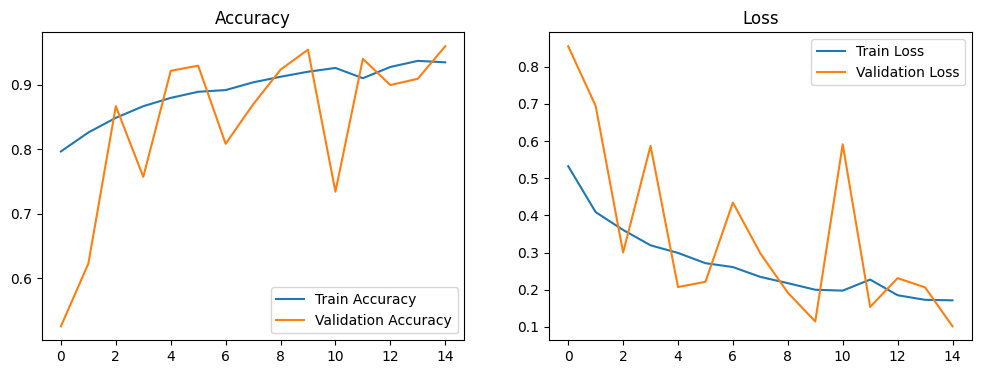

In [21]:
print(classification_report(true_labels, predictions, target_names=['With Mask', 'Without Mask']))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()